In [1]:
import os
import numpy as np
import torch
import matplotlib.pyplot as plt
from deepMacroFin import PDEModel
from deepMacroFin import ActivationType, Comparator, EndogVar, EndogVarConditions, EndogEquation, LayerType

## Model 1
$$\frac{d x}{d t} = 2 * t, x(0)=1$$
Solution: $x(t)=t^2 + 1$

In [2]:
ode1 = PDEModel("ode1", config={"num_epochs": 100, "lr": 1})
ode1.set_state(["t"], {"t": [-2., 2.]})
ode1.add_endog("x", {
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "hidden_units": [1, 2, 2, 1],
    "layer_type": LayerType.KAN,
    "activation_type": ActivationType.SiLU,
    "positive": False,
    "derivative_order": 2,
})
ode1.add_endog_equation(r"$\frac{\partial x}{\partial t} = 2 * t$", label="base_ode")
ode1.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="initial_condition")
print(ode1)
if not os.path.exists("./models/ode1.pt"):
    ode1.train_model_kan("./models", "ode1.pt", True)
    ode1.eval_model(True)
else:
    ode1.load_model(torch.load("./models/ode1.pt"))
    ode1.eval_model()

=============================Summary of Model ode1==============================
Config: {
 "num_epochs": 100,
 "lr": 1
}
Latex Variable Mapping: {}

================================State Variables=================================
t: [-2.0, 2.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): KAN(
    (biases): ModuleList(
      (0-1): 2 x Linear(in_features=2, out_features=1, bias=False)
      (2): Linear(in_features=1, out_features=1, bias=False)
    )
    (act_fun): ModuleList(
      (0-2): 3 x KANLayer(
        (base_fun): SiLU()
      )
    )
    (base_fun): SiLU()
    (symbolic_fun): ModuleList(
      (0-2): 3 x Symbolic_KANLayer()
    )
  )
)
Num parameters: 149
---------------------------------------------------------------------------

D:\UofT\Research\PDE-work\continuous-time-eco-models\deepMacroFin\models\kan\KAN.py:329: UserWarning: std(): degrees of freedom is <= 0. Correction should be strictly less than the reduction factor (input numel divided by output numel). (Triggered internally at ..\aten\src\ATen\native\ReduceOps.cpp:1807.)
  self.acts_scale_std.append(torch.std(postacts, dim=0))


====================================Training====================================


100%|██████████| 100/100 [00:28<00:00,  3.49it/s]

training finished, total time :: 28.640920877456665
Model saved to ./models/ode1.pt
===================================Evaluating===================================
loss :: endogeq_base_ode: 0.0063,
endogvar_x_cond_initial_condition: 0.0000,
total_loss: 0.0063


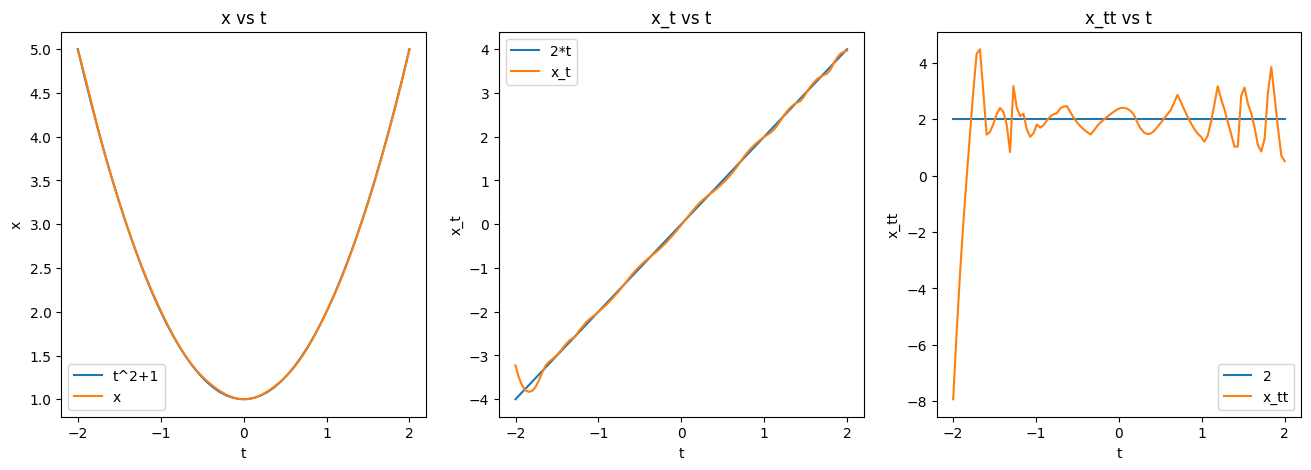

In [3]:
fig, ax = plt.subplots(1, 3, figsize=(16, 5))
t = np.linspace(-2, 2)
ax[0].plot(t, t**2+1, label="t^2+1")
ax[1].plot(t, 2*t, label="2*t")
ax[2].plot(t, np.ones_like(t) * 2, label="2")
ode1.endog_vars["x"].plot("x", {"t": [-2, 2]}, ax=ax[0])
ode1.endog_vars["x"].plot("x_t", {"t": [-2, 2]}, ax=ax[1])
ode1.endog_vars["x"].plot("x_tt", {"t": [-2, 2]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

## Model 2
$$\frac{d x}{d t} = x, x(0)=1$$
Solution: $x(t)=e^t$

In [4]:
ode2 = PDEModel("ode2", config={"num_epochs": 100, "lr": 1})
ode2.set_state(["t"], {"t": [-2., 2.]})
ode2.add_endog("x", {
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "hidden_units": [1, 2, 2, 1],
    "layer_type": LayerType.KAN,
    "activation_type": ActivationType.SiLU,
    "positive": False,
    "derivative_order": 2,
})
ode2.add_endog_equation("x_t=x", label="base_ode")
ode2.add_endog_condition("x", 
                              "x(SV)", {"SV": torch.zeros((1, 1))},
                              Comparator.EQ,
                              "1", {},
                              label="initial_condition")
print(ode2)
if not os.path.exists("./models/ode2.pt"):
    ode2.train_model_kan("./models", "ode2.pt", True)
    ode2.eval_model(True)
else:
    ode2.load_model(torch.load("./models/ode2.pt"))
    ode2.eval_model()

=============================Summary of Model ode2==============================
Config: {
 "num_epochs": 100,
 "lr": 1
}
Latex Variable Mapping: {}

================================State Variables=================================
t: [-2.0, 2.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: x
EndogVar(
  (model): KAN(
    (biases): ModuleList(
      (0-1): 2 x Linear(in_features=2, out_features=1, bias=False)
      (2): Linear(in_features=1, out_features=1, bias=False)
    )
    (act_fun): ModuleList(
      (0-2): 3 x KANLayer(
        (base_fun): SiLU()
      )
    )
    (base_fun): SiLU()
    (symbolic_fun): ModuleList(
      (0-2): 3 x Symbolic_KANLayer()
    )
  )
)
Num parameters: 149
---------------------------------------------------------------------------

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:27<00:00,  3.70it/s]

training finished, total time :: 27.052454710006714
Model saved to ./models/ode2.pt
===================================Evaluating===================================
loss :: endogeq_base_ode: 0.0001,
endogvar_x_cond_initial_condition: 0.0000,
total_loss: 0.0001


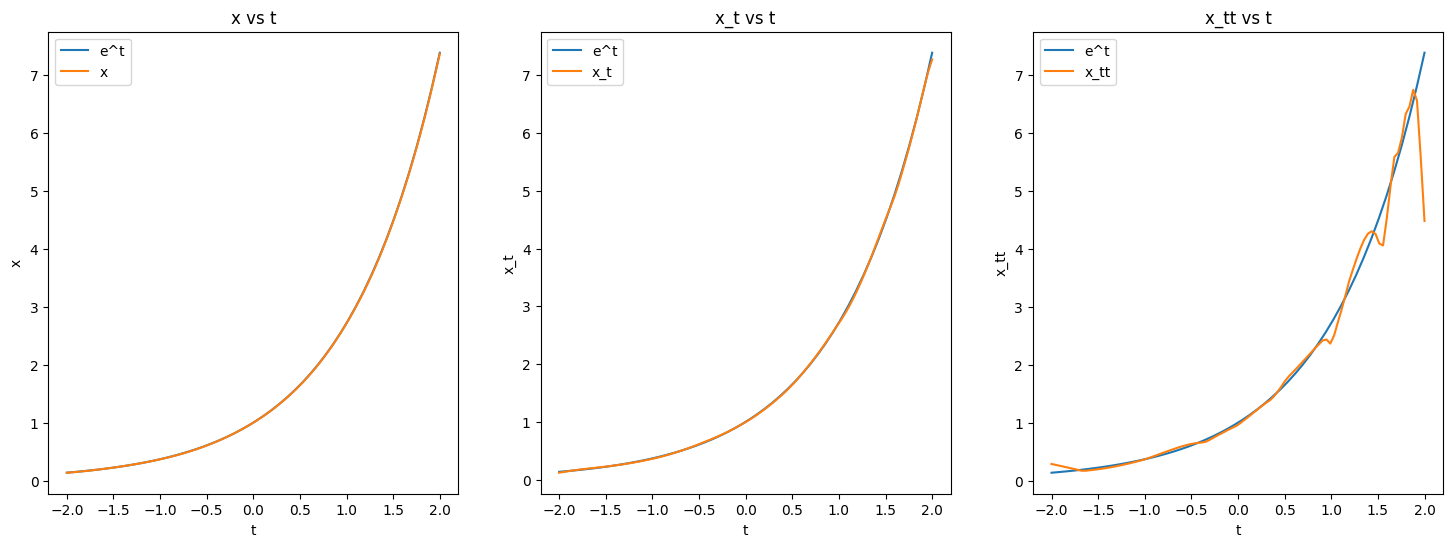

In [5]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
t = np.linspace(-2, 2)
ax[0].plot(t, np.exp(t), label="e^t")
ax[1].plot(t, np.exp(t), label="e^t")
ax[2].plot(t, np.exp(t), label="e^t")
ode2.endog_vars["x"].plot("x", {"t": [-2, 2]}, ax=ax[0])
ode2.endog_vars["x"].plot("x_t", {"t": [-2, 2]}, ax=ax[1])
ode2.endog_vars["x"].plot("x_tt", {"t": [-2, 2]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

## Second order linear ODE
$$y''+2y'+y=0, y(0)=1, y(1)=3e^{-1}$$

Solution: $y=(1+2x)e^{-x}$

**Note: ** when switched to $y''+4y'+4y=0, y(1)=3e^{-2}$, with solution $y=(1+2x)e^{-2x}$, it doesn't work too well.

In [6]:
ode3 = PDEModel("second_order_linear", config={"num_epochs": 100, "lr": 1})
ode3.set_state(["x"], {"x": [-1., 1.]})
ode3.add_endog("y", config={
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "hidden_units": [1, 2, 2, 1],
    "layer_type": LayerType.KAN,
    "activation_type": ActivationType.SiLU,
    "positive": False,
    "derivative_order": 2,
})
ode3.add_endog_equation("y_xx+2*y_x+y=0", label="base_ode")
ode3.add_endog_condition("y", 
                            "y(SV)", {"SV": torch.zeros((1, 1))},
                            Comparator.EQ,
                            "1", {},
                            label="ic1")
ode3.add_endog_condition("y", 
                            "y(SV)", {"SV": torch.ones((1, 1))},
                            Comparator.EQ,
                            "target", {"target": 3 * torch.exp(-torch.ones((1, 1)))},
                            label="ic2")
print(ode3)
if not os.path.exists("./models/ode3.pt"):
    ode3.train_model_kan("./models", "ode3.pt", True)
    ode3.eval_model(True)
else:
    ode3.load_model(torch.load("./models/ode3.pt"))
    ode3.eval_model()

======================Summary of Model second_order_linear======================
Config: {
 "num_epochs": 100,
 "lr": 1
}
Latex Variable Mapping: {}

================================State Variables=================================
x: [-1.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: y
EndogVar(
  (model): KAN(
    (biases): ModuleList(
      (0-1): 2 x Linear(in_features=2, out_features=1, bias=False)
      (2): Linear(in_features=1, out_features=1, bias=False)
    )
    (act_fun): ModuleList(
      (0-2): 3 x KANLayer(
        (base_fun): SiLU()
      )
    )
    (base_fun): SiLU()
    (symbolic_fun): ModuleList(
      (0-2): 3 x Symbolic_KANLayer()
    )
  )
)
Num parameters: 149
---------------------------------------------------------------------------

  0%|          | 0/100 [00:00<?, ?it/s]

100%|██████████| 100/100 [00:49<00:00,  2.02it/s]

training finished, total time :: 49.475603103637695
Model saved to ./models/ode3.pt
===================================Evaluating===================================
loss :: endogeq_base_ode: 0.0247,
endogvar_y_cond_ic1: 0.0314,
endogvar_y_cond_ic2: 0.1069,
total_loss: 0.1630


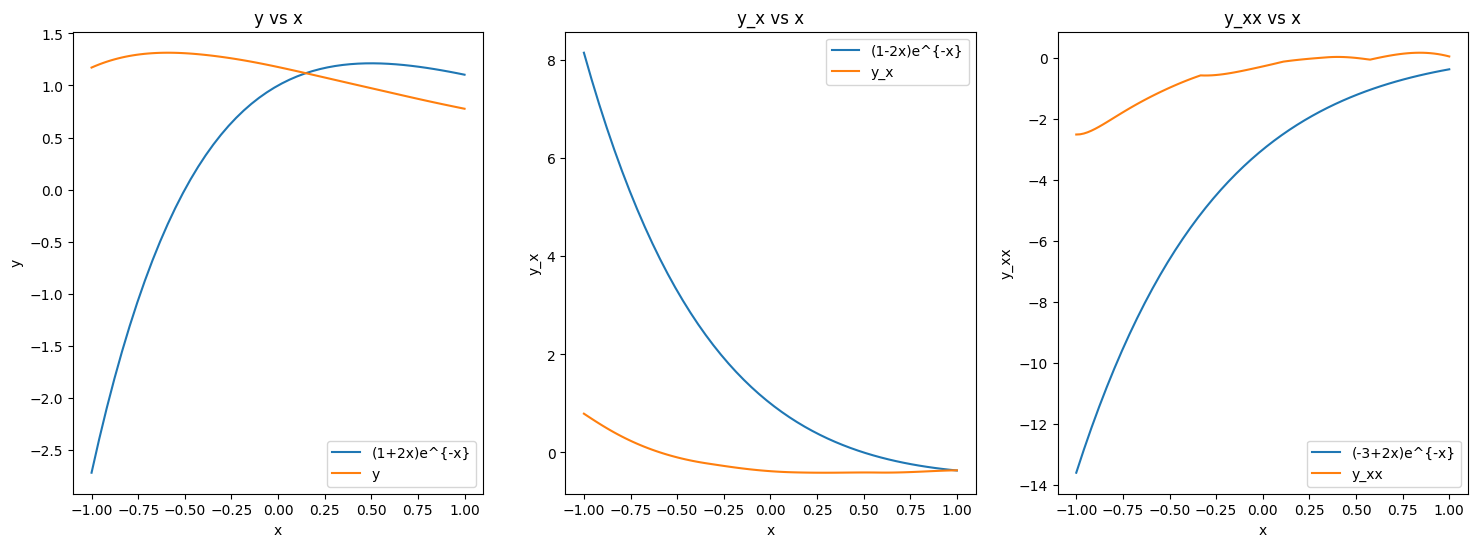

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
x = np.linspace(-1, 1)
ax[0].plot(x, (1 + 2 * x) * np.exp(-x), label="(1+2x)e^{-x}")
ax[1].plot(x, (1 - 2 * x) * np.exp(-x), label="(1-2x)e^{-x}")
ax[2].plot(x, (-3 + 2 * x) * np.exp(-x), label="(-3+2x)e^{-x}")
ode3.endog_vars["y"].plot("y", {"x": [-1, 1]}, ax=ax[0])
ode3.endog_vars["y"].plot("y_x", {"x": [-1, 1]}, ax=ax[1])
ode3.endog_vars["y"].plot("y_xx", {"x": [-1, 1]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

## Second order linear ODE
$$y''+4y'+4y=0, y(0)=1, y(1)=3e^{-2}$$

Solution: $y=(1+2x)e^{-2x}$

In [8]:
ode4 = PDEModel("second_order_linear", config={"num_epochs": 100, "lr": 1})
ode4.set_state(["x"], {"x": [-1., 1.]})
ode4.add_endog("y", config={
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "hidden_units": [1, 2, 2, 1],
    "layer_type": LayerType.KAN,
    "activation_type": ActivationType.SiLU,
    "positive": False,
    "derivative_order": 2,
})
ode4.add_endog_equation("y_xx+4*y_x+4*y=0", label="base_ode")
ode4.add_endog_condition("y", 
                            "y(SV)", {"SV": torch.zeros((1, 1))},
                            Comparator.EQ,
                            "1", {},
                            label="ic1")
ode4.add_endog_condition("y", 
                            "y(SV)", {"SV": torch.ones((1, 1))},
                            Comparator.EQ,
                            "target", {"target": 3 * torch.exp(-2 * torch.ones((1, 1)))},
                            label="ic2")
print(ode4)
if not os.path.exists("./models/ode4.pt"):
    ode4.train_model_kan("./models", "ode4.pt", True)
    ode4.eval_model(True)
else:
    ode4.load_model(torch.load("./models/ode4.pt"))
    ode4.eval_model()

======================Summary of Model second_order_linear======================
Config: {
 "num_epochs": 100,
 "lr": 1
}
Latex Variable Mapping: {}

================================State Variables=================================
x: [-1.0, 1.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: y
EndogVar(
  (model): KAN(
    (biases): ModuleList(
      (0-1): 2 x Linear(in_features=2, out_features=1, bias=False)
      (2): Linear(in_features=1, out_features=1, bias=False)
    )
    (act_fun): ModuleList(
      (0-2): 3 x KANLayer(
        (base_fun): SiLU()
      )
    )
    (base_fun): SiLU()
    (symbolic_fun): ModuleList(
      (0-2): 3 x Symbolic_KANLayer()
    )
  )
)
Num parameters: 149
---------------------------------------------------------------------------

100%|██████████| 100/100 [01:16<00:00,  1.31it/s]

training finished, total time :: 76.12775707244873
Model saved to ./models/ode4.pt
===================================Evaluating===================================
loss :: endogeq_base_ode: 0.0203,
endogvar_y_cond_ic1: 0.0002,
endogvar_y_cond_ic2: 0.0298,
total_loss: 0.0503


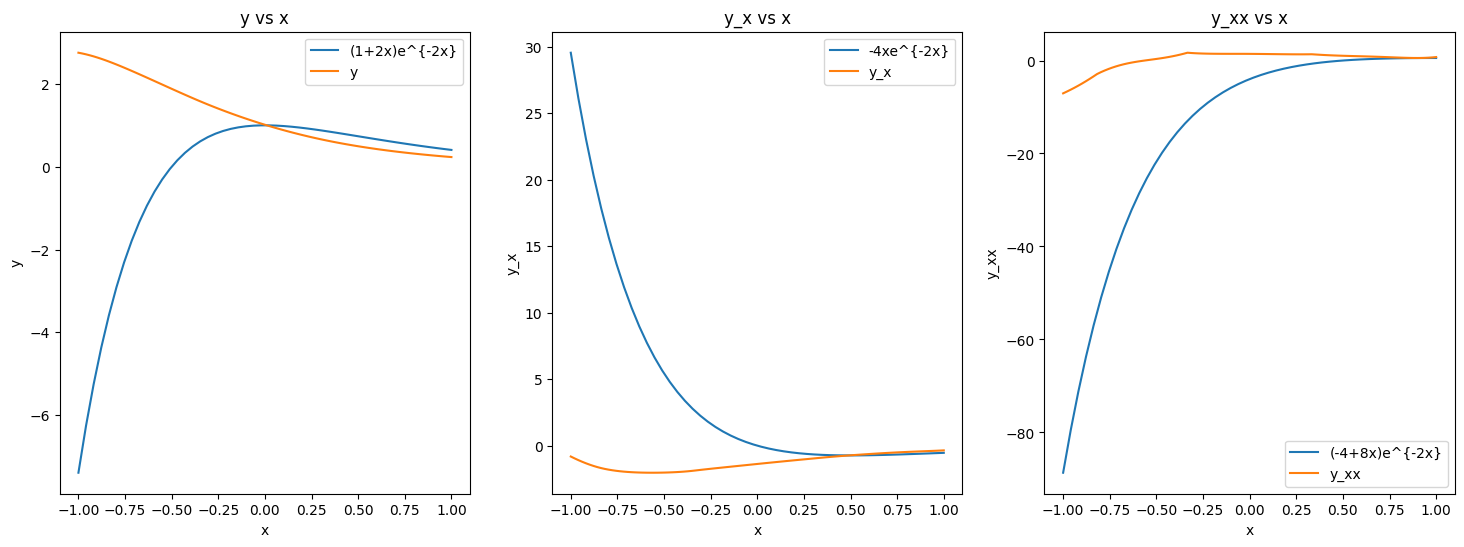

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
x = np.linspace(-1, 1)
ax[0].plot(x, (1 + 2 * x) * np.exp(-2*x), label="(1+2x)e^{-2x}")
ax[1].plot(x, -4 * x * np.exp(-2*x), label="-4xe^{-2x}")
ax[2].plot(x, (-4 + 8 * x) * np.exp(-2*x), label="(-4+8x)e^{-2x}")
ode4.endog_vars["y"].plot("y", {"x": [-1, 1]}, ax=ax[0])
ode4.endog_vars["y"].plot("y_x", {"x": [-1, 1]}, ax=ax[1])
ode4.endog_vars["y"].plot("y_xx", {"x": [-1, 1]}, ax=ax[2])
plt.subplots_adjust()
plt.show()

## Cauchy-Euler Equations
$$ x^2 y'' + 6xy' + 4y =0, y(1)=6, y(2)=\frac{5}{4}$$

Solution: $y=4x^{-4} + 2 x^{-1}$

In [10]:
ode5 = PDEModel("cauchy_euler", config={"num_epochs": 100, "lr": 1})
ode5.set_state(["x"], {"x": [1., 2.]})
ode5.add_endog("y", config={
    "device": "cuda" if torch.cuda.is_available() else "cpu",
    "hidden_units": [1, 2, 2, 1],
    "layer_type": LayerType.KAN,
    "activation_type": ActivationType.SiLU,
    "positive": False,
    "derivative_order": 2,
})
ode5.add_endog_equation("x**2 * y_xx + 6*x*y_x + 4*y=0", label="base_ode")
ode5.add_endog_condition("y", 
                              "y(SV)", {"SV": torch.ones((1, 1))},
                              Comparator.EQ,
                              "6", {},
                              label="ic1")
ode5.add_endog_condition("y", 
                              "y(SV)", {"SV": 2 * torch.ones((1, 1))},
                              Comparator.EQ,
                              "5/4", {},
                              label="ic2")
print(ode5)
if not os.path.exists("./models/cauchy_euler.pt"):
    ode5.train_model("./models", "cauchy_euler.pt", True)
    ode5.eval_model(True)
else:
    ode5.load_model(torch.load("./models/cauchy_euler.pt"))
    ode5.eval_model()

=========================Summary of Model cauchy_euler==========================
Config: {
 "num_epochs": 100,
 "lr": 1
}
Latex Variable Mapping: {}

================================State Variables=================================
x: [1.0, 2.0]

=====================================Agents=====================================

================================Agent Conditions================================

==============================Endogenous Variables==============================
Endogenous Variable Name: y
EndogVar(
  (model): KAN(
    (biases): ModuleList(
      (0-1): 2 x Linear(in_features=2, out_features=1, bias=False)
      (2): Linear(in_features=1, out_features=1, bias=False)
    )
    (act_fun): ModuleList(
      (0-2): 3 x KANLayer(
        (base_fun): SiLU()
      )
    )
    (base_fun): SiLU()
    (symbolic_fun): ModuleList(
      (0-2): 3 x Symbolic_KANLayer()
    )
  )
)
Num parameters: 149
----------------------------------------------------------------------------

100%|██████████| 100/100 [00:04<00:00, 24.25it/s]


training finished, total time :: 4.12723708152771
Model saved to ./models/cauchy_euler.pt
===================================Evaluating===================================
loss :: endogeq_base_ode: 0.3563,
endogvar_y_cond_ic1: 32.8613,
endogvar_y_cond_ic2: 1.1649,
total_loss: 34.3826


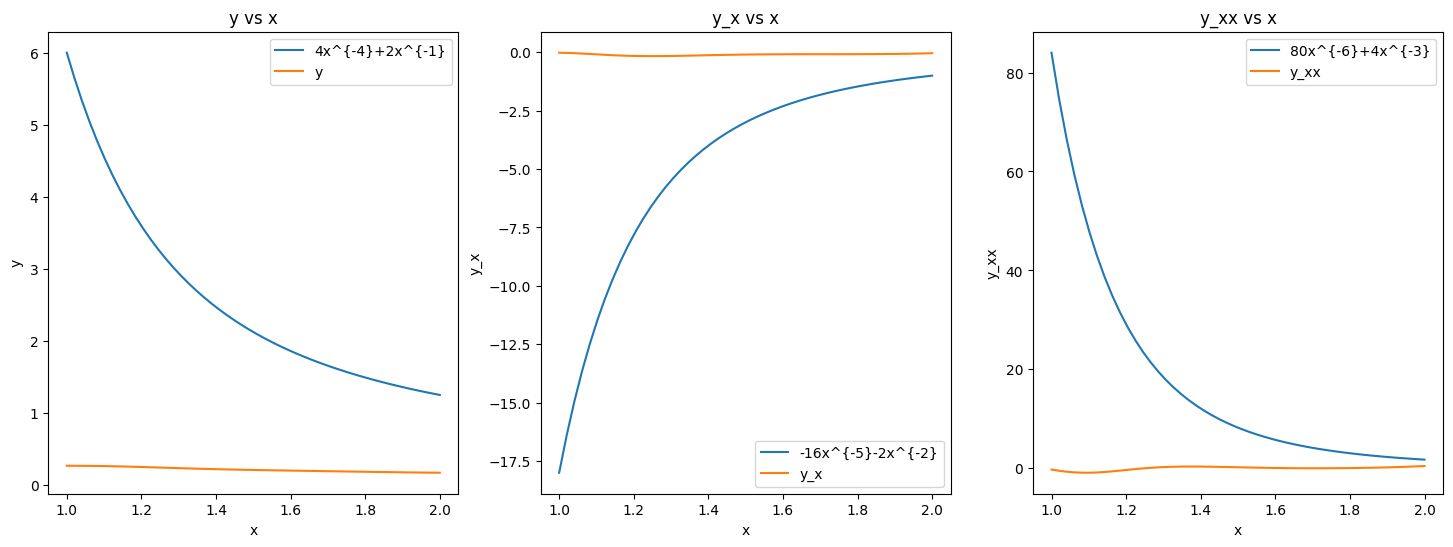

In [11]:
fig, ax = plt.subplots(1, 3, figsize=(18, 6))
x = np.linspace(1, 2)
ax[0].plot(x, 4*x**(-4) + 2 * x**(-1), label="4x^{-4}+2x^{-1}")
ax[1].plot(x, -16*x**(-5)-2*x**(-2), label="-16x^{-5}-2x^{-2}")
ax[2].plot(x, 80*x**(-6) + 4*x**(-3), label="80x^{-6}+4x^{-3}")
ode5.endog_vars["y"].plot("y", {"x": [1, 2]}, ax=ax[0])
ode5.endog_vars["y"].plot("y_x", {"x": [1, 2]}, ax=ax[1])
ode5.endog_vars["y"].plot("y_xx", {"x": [1, 2]}, ax=ax[2])
plt.subplots_adjust()
plt.show()